<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/DataStructuresAndAlgorithms/Lecture%2007%20-%20Pattern%20Matching/Lecture_07_Pattern_Searching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

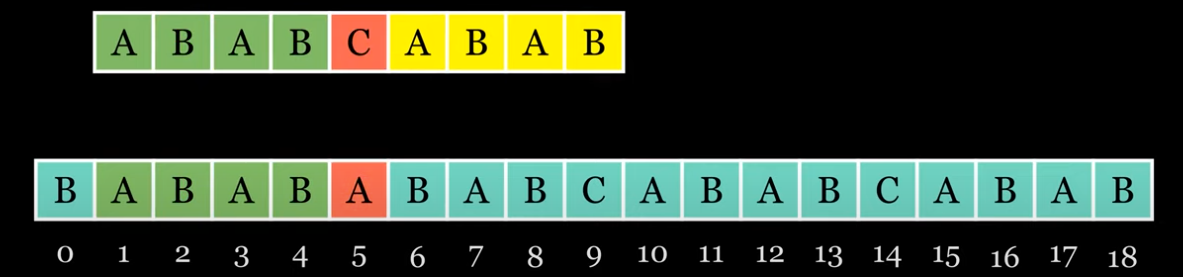

In [1]:
import time
import random
def brute_force_search(text, pattern):
    n, m = len(text), len(pattern)
    positions = []
    comparisons = 0
    for i in range(n - m + 1):
        match = True
        for j in range(m):
            comparisons += 1
            if text[i + j] != pattern[j]:
                match = False
                break
        if match:
            positions.append(i)
    return positions, comparisons


In [4]:
text = "CCBBCCABCABCABCABC"
pattern = "BBCCA"

p,c = brute_force_search(text,pattern)
print(p,c)

[2] 22


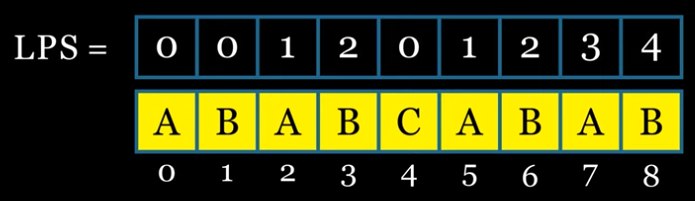

In [5]:
def compute_lps(pattern):
    m = len(pattern)
    lps = [0] * m
    length = 0
    i = 1
    while i < m:
        if pattern[i] == pattern[length]:
            length += 1
            lps[i] = length
            i += 1
        else:
            if length != 0:
                length = lps[length-1]
            else:
                lps[i] = 0
                i += 1
    return lps



In [6]:
compute_lps("ababcabab")

[0, 0, 1, 2, 0, 1, 2, 3, 4]

In [8]:
def kmp_search(text, pattern):
    n, m = len(text), len(pattern)
    positions = []
    comparisons = 0
    lps = compute_lps(pattern)
    i = j = 0  # índices de text e pattern
    while i < n:
        comparisons += 1
        if text[i] == pattern[j]:
            i += 1
            j += 1
        if j == m:
            positions.append(i-j)
            j = lps[j-1]
        elif i < n and text[i] != pattern[j]:
            if j != 0:
                j = lps[j-1]
            else:
                i += 1
    return positions, comparisons

In [9]:
text = "CCBBCCABCABCABCABC"
pattern = "BBCCA"

p,c = kmp_search(text,pattern)
print(p,c)

[2] 18


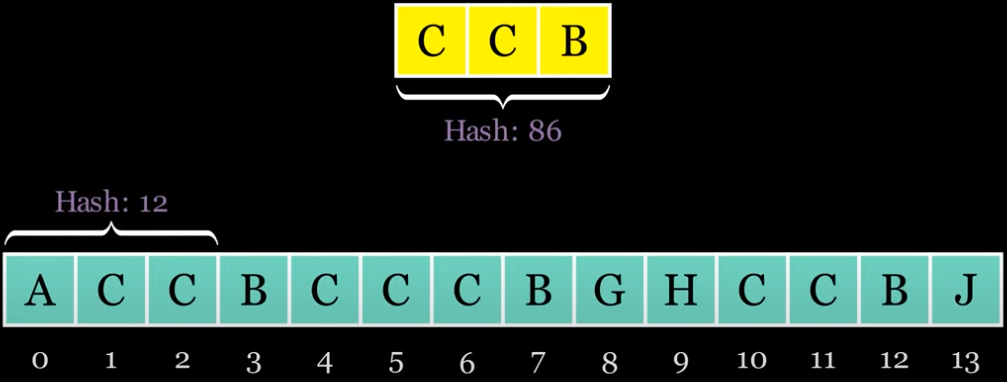

In [ ]:
def rabin_karp_search(text, pattern, base=256, mod=101):
    n, m = len(text), len(pattern)
    positions = []
    comparisons = 0
    hpattern = 0
    htext = 0
    h = pow(base, m-1, mod)

    # Hash inicial
    for i in range(m):
        hpattern = (base*hpattern + ord(pattern[i])) % mod
        htext = (base*htext + ord(text[i])) % mod

    for i in range(n - m + 1):
        comparisons += 1
        if hpattern == htext:
            # Confirma caractere a caractere
            if text[i:i+m] == pattern:
                positions.append(i)

        if i < n - m:
            htext = (htext - ord(text[i]) * h) * base + ord(text[i+m])
            htext %= mod
            if htext < 0:
                htext += mod
    return positions, comparisons

In [10]:
text = "CCBBCCABCABCABCABC"
pattern = "ABC"

algorithms = [("Brute Force", brute_force_search),
              ("Rabin-Karp", rabin_karp_search),
              ("KMP", kmp_search)]

for name, func in algorithms:
    start = time.time()
    pos, comp = func(text, pattern)
    end = time.time()
    print(f"{name}: positions={pos}, comparisons={comp}, time={end-start:.6f}s")

NameError: name 'rabin_karp_search' is not defined

In [24]:
def random_text(length, charset="ABC"):
    return ''.join(random.choices(charset, k=length))

def random_pattern(length, charset="ABC"):
    return ''.join(random.choices(charset, k=length))

text = random_text(1000,'ABCD')
patt = random_pattern(3,'AB')
print(text)
print(patt)

CCACACCDCBAADDCAABDBBADACCDCAABBAABDDDCBABCDBCBCABADBCACBDDAAABBCDACCBCADAADCABAAAADCCDADCDDACBCBDACCDCBBCBAACCDCAADAAABCBDDAABDBDCABDCDCCADCDDBABBCABCBACACCBCDBBDBACDDACDCABCCACCABDBAADACDDADADDDCBDCBBCCDABACDCCCAAACACDDBDACDDABCBABDBDCBCACAADCCBCCAABCABCADBCDACDCCCDBBDCBDBDBDADDBBCDBCDCACCCAAADDBABBCAAACDDBBBDBCCACBCCCBCDCCDBACAADABDDACBCDADCCCBCDDDBCBCABCBBDADCADDDDABDADACDBACABACADABDCABDBABAABDBCCAABDBBCCABBADACDCCDCCABDCDAADBACCCBDCDACADAAABBABDDBDABABBBDDDACBDDCCBDBDDBCDDABADCCBCACACADADCCDBCDCBBABDAAABADDBCACCABBADBBBDCDCDAACDDBBCBCBBCCCADCDCCDBBADDADCCCBACCBDDDCABDCDCDADBBBDBBDBBBAADBADAABCCBDDBBCACDADCAABDADDBACADBCAABBBDAADBDBDDDABCAACDCBACBCCCBBADBBBBDBCAABDBACBCCAACCABABCBDCACBCDBACDBCCADDCDBADABCDBDABAADABDDBDBCDDADBACDCBBBDBBDBCABACADDCDCADADAACACDABBBDBACBBCDDCCCACBDBACADDBABAACDCBACADADBBDDDBCDDDCCDBBCDAABADDADCADCCBBCABDDCACDBCCABDDBAACBBACDDACDCABDCDBBBDDCDBDADBDCCBDCBACCDDBCDBCDBABBDCABCCBDBDBBDACCADADBCADABDCCDCBBCABDDDDAACABBAADBABDCBBDBADDCCBBDBACAADBBCCDDBADCDDA

In [ ]:

# Textos de diferentes tamanhos (aleatórios)
charset_text = 'ABC'
texts = {
    "Small": random_text(30,charset_text),
    "Medium": random_text(500, charset_text),
    "Large": random_text(5000, charset_text),
	"ULarge": random_text(15000, charset_text)
}

charset_patt = 'AB'
patterns = [random_pattern(l,charset_patt) for l in [2, 3, 5, 7]]

algorithms = [("Brute Force", brute_force_search),
              ("Rabin-Karp", rabin_karp_search),
              ("KMP", kmp_search)]

print("=== Comparativo de Algoritmos ===\n")

for t_name, text in texts.items():
    for pattern in patterns:
        print(f"Text: {t_name} ({len(text)} chars), Pattern: '{pattern}' ({len(pattern)} chars)")
        for name, func in algorithms:
            start = time.time()
            pos, comp = func(text, pattern)
            end = time.time()
            print(f"  {name}: positions={pos[:5]}{'...' if len(pos)>5 else ''}, comparisons={comp}, time={end-start:.6f}s")
        print()

=== Comparativo de Algoritmos ===

Text: Small (30 chars), Pattern: 'CA' (2 chars)
  Brute Force: positions=[0, 5, 8, 15, 21]..., comparisons=40, time=0.000020s
  Rabin-Karp: positions=[0, 5, 8, 15, 21]..., comparisons=29, time=0.000034s
  KMP: positions=[0, 5, 8, 15, 21]..., comparisons=30, time=0.000016s

Text: Small (30 chars), Pattern: 'ACB' (3 chars)
  Brute Force: positions=[12, 16], comparisons=43, time=0.000015s
  Rabin-Karp: positions=[12, 16], comparisons=28, time=0.000023s
  KMP: positions=[12, 16], comparisons=30, time=0.000014s

Text: Small (30 chars), Pattern: 'ABCCC' (5 chars)
  Brute Force: positions=[1], comparisons=41, time=0.000013s
  Rabin-Karp: positions=[1], comparisons=26, time=0.000020s
  KMP: positions=[1], comparisons=30, time=0.000013s

Text: Small (30 chars), Pattern: 'CCCBBCA' (7 chars)
  Brute Force: positions=[], comparisons=38, time=0.000012s
  Rabin-Karp: positions=[], comparisons=24, time=0.000019s
  KMP: positions=[], comparisons=33, time=0.000017s

T